In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR


In [2]:
df= pd.read_csv('https://angel-corona.s3.amazonaws.com/owid-covid-data.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()
df_filtered = df[df['location'] != 'International']
df_filter = df_filtered[df_filtered['location'] != 'World']
df_filter.to_csv('file1.csv')
data=df_filter.fillna(0.0)
d=df.fillna(0.0)

In [4]:
x=data.iloc[:,[25,37,38,40]]
x

,stringency_index,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,0.0,37.746,0.5,0.498
1,0.0,37.746,0.5,0.498
2,0.0,37.746,0.5,0.498
3,0.0,37.746,0.5,0.498
4,0.0,37.746,0.5,0.498
...,...,...,...,...
48860,0.0,36.791,1.7,0.535
48861,0.0,36.791,1.7,0.535
48862,0.0,36.791,1.7,0.535
48863,0.0,36.791,1.7,0.535


In [5]:

Y=data.iloc[:,[5,8]]
Y

,new_cases,new_deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
48860,17.0,1.0
48861,4.0,0.0
48862,32.0,0.0
48863,43.0,0.0


In [6]:
x_train, x_test, y_train, y_test =train_test_split(x,Y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
Y_train = sc.fit_transform(y_train)
X_test=sc.fit_transform(x_test)
Y_test=sc.fit_transform(y_test)



In [7]:
model = LinearSVR()
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train,Y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, X_test, Y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MAE: 0.174 (0.030)


In [10]:
from sklearn.metrics import mean_squared_error
def test_model(model_name):
    model=model_name()
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error=mean_squared_error(Y_test,y_pred)
    return y_pred,error



In [12]:
y_Decision,error_Decision=test_model(DecisionTreeRegressor)
y_Random,error_Random=test_model(RandomForestRegressor)
print("Error in RandomForestRegressor:" + str(error_Random))
print("Error in DecisionTreeRegressor:" + str(error_Decision))

Error in RandomForestRegressor:0.6623183272169253
Error in DecisionTreeRegressor:0.9881175747405044


In [13]:
!pip install pyramid.arima
from pyramid.arima import auto_arima

  Using cached pyramid_arima-0.9.0-cp36-cp36m-manylinux1_x86_64.whl (597 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace begi

In [21]:
# Forecasting using ARIMA Model
def arima_cp(data, country_name, target, start_date, end_date):
    
    #Select data for the Country/Region, splitting train/test dates
    data_cp = data.loc[(data['location']==country_name)]
    data_cp_train = data_cp.loc[(data_cp['date'])<start_date, target]
    data_cp_test = data_cp.loc[(data_cp['date'])>start_date]
    test_cp_date =  data_cp_test.loc[(data_cp_test['date']<end_date),target]
    # Set the range of parameters to use
    stepwise_model = auto_arima(data_cp[target], start_p=1, start_q=1, max_p=30, max_q=30, 
                                start_P=0, seasonal=False, d=2, trace=False, error_action='ignore', stepwise=True)

    # Train and predict
    stepwise_model.fit(data_cp_train, start_ar_lags=2*max(30, 30))
    forecast = stepwise_model.predict(n_periods=len(test_cp_date))
    
    #Plotting
    valid_num = len(test_cp_date)
    df_train = data.loc[(data['location']==country_name),target]
    df_fcst = np.append(df_train[:-valid_num], forecast[:valid_num])
    dates = list(range(0,len(df_train)))
    plt.plot(dates, df_fcst)
    plt.plot(dates, df_train)
    plt.axvline(len(df_train)-valid_num-1, linewidth=2, ls = ':', color='grey', alpha=0.5)
    plt.title("Actual "+ target +" vs predictions based on ARIMA for " + country_name )
    plt.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    plt.xlabel("Days from January 2020 to 11th October 2020")
    plt.ylabel(target)
    plt.savefig("target.jpg")
    return forecast

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_

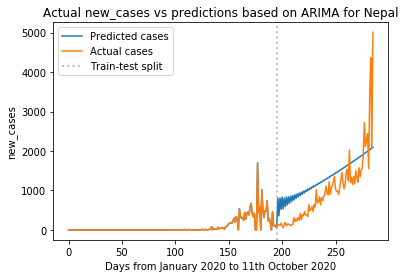

In [23]:
 forecast_newcases=arima_cp(d,'Nepal','new_cases','2020-07-01','2020-09-30')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


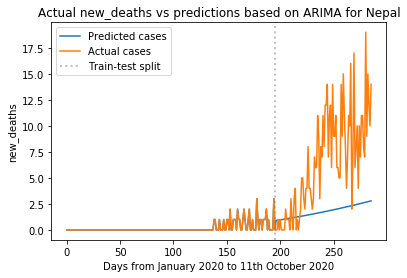

In [22]:

forecast= arima_cp(d,'Nepal','new_deaths','2020-07-01','2020-09-30')
